In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
source = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'
df = pd.read_html(source, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")[0]
print(born_date.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


In [55]:
""" Shape born table """
print(df.shape)

(28, 9)


In [56]:
""" Dtypes """
print(df.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


In [57]:
""" Change to NaN """
columns_replace = ["2019", "2014"]
df[["2014", "2019"]] = df[columns_replace].replace("—", np.nan)
print("\n<-------------------------------------------------------------------------------------------->\n")
""" summ().isnull() """
print(df.isnull().sum())
print("\n<-------------------------------------------------------------------------------------------->\n")
print(df)
print("\n<-------------------------------------------------------------------------------------------->\n")


<-------------------------------------------------------------------------------------------->

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      4
2019      2
dtype: int64

<-------------------------------------------------------------------------------------------->

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2   7.6  10.9
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  10.1  14.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2   7.1  11.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   NaN   8.2
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2   7.9  12.0
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  10.4  14.6
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6   6.8  10.6
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12

In [61]:
""" Convert NaN  to int """

df[["2014", "2019"]] = df[["2014", "2019"]].fillna(df[["2014", "2019"]].astype(float).mean())

""" Change type 2014 and 2019 """

df[["2014", "2019"]] = df[["2014", "2019"]].astype(float).round(1)

""" mean value for 1950, 1960, 1970 """
df[["1950", "1960", "1970"]] = df[["1950", "1960", "1970"]].fillna(df[["1950", "1960", "1970"]].astype(float).mean()).round(1)
print("\n<-------------------------------------------------------------------------------------------->\n")
print(df.dtypes)
print("\n<-------------------------------------------------------------------------------------------->\n")
print(df)



<-------------------------------------------------------------------------------------------->

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

<-------------------------------------------------------------------------------------------->

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   8.0  11.1
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2   7.6  10.9
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  10.1  14.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2   7.1  11.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.0   8.2
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2   7.9  12.0
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  10.4  14.6
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6   6.8  10.6


In [62]:
""" Drop last """
drop = df.drop(27)
print(drop)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   8.0  11.1
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2   7.6  10.9
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  10.1  14.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2   7.1  11.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.0   8.2
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2   7.9  12.0
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  10.4  14.6
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6   6.8  10.6
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4   8.8  12.2
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2   8.0  12.1
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0   6.8  10.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   8.0   5.1
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9   8.7  11.9
13       Миколаївськ

In [19]:
""" Region Above average 2019 """

average_birth_rate = df['2019'].mean().round(2)
selected_regions = df[df['2019'] > average_birth_rate]['Регіон']
print(f"Mean rating {average_birth_rate} \n{selected_regions.tolist()}")


Mean rating 111.39 
['Волинська', 'Житомирська', 'Закарпатська', 'Івано-Франківська', 'Київська', 'Львівська', 'Миколаївська', 'Одеська', 'Рівненська', 'Херсонська', 'Хмельницька', 'Чернівецька', 'Київ']


In [63]:
""" Highest birth region """

highest_birth_reg = df.loc[df["2014"].idxmax(), 'Регіон']
highest_birth_val = df["2014"].max()
print(f"{highest_birth_reg}: {highest_birth_val}")

Київ: 11.0


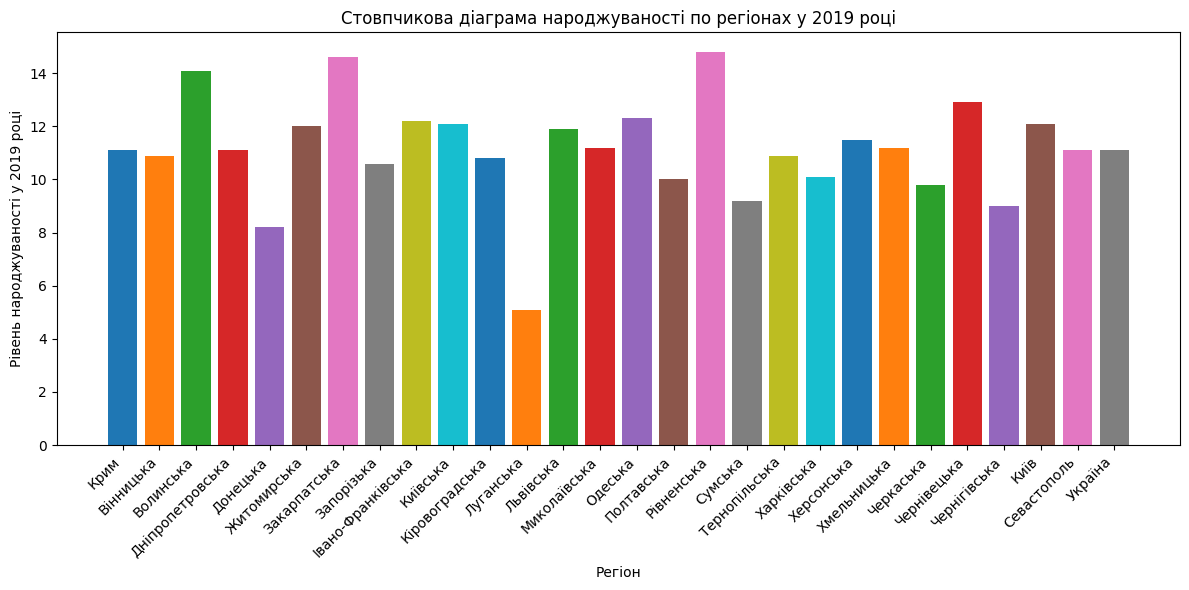

In [65]:
""" bar Diagrams """
plt.figure(figsize=(12, 6))
for inx in range(len(df)):
    plt.bar(df['Регіон'][inx], df['2019'][inx])

plt.xlabel('Регіон')
plt.ylabel('Рівень народжуваності у 2019 році')
plt.title('Стовпчикова діаграма народжуваності по регіонах у 2019 році')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

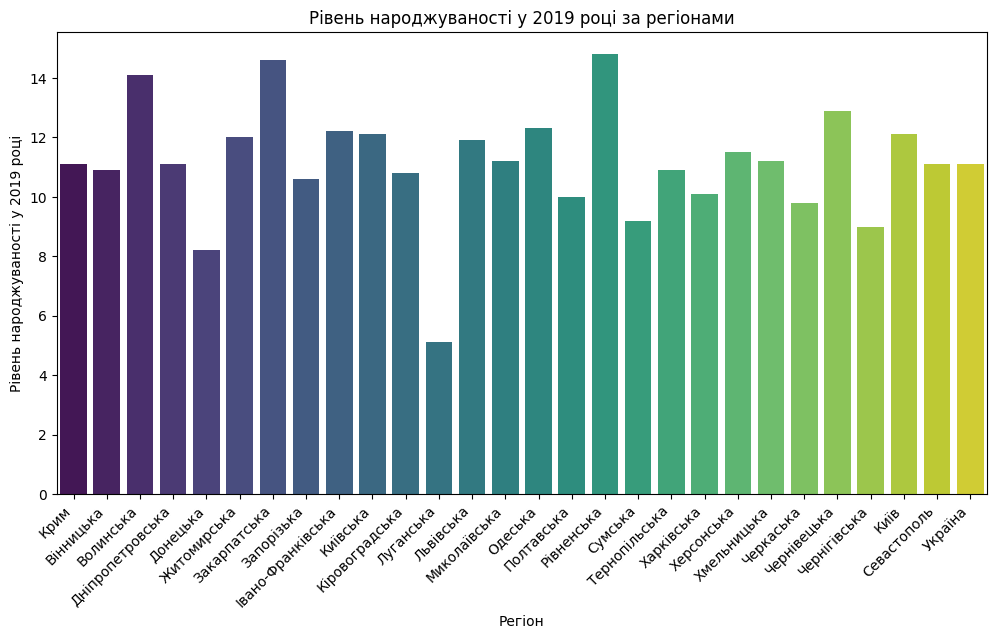

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Регіон', y='2019', hue='Регіон', data=df, palette='viridis', legend=False)
plt.xlabel('Регіон')
plt.ylabel('Рівень народжуваності у 2019 році')
plt.title('Рівень народжуваності у 2019 році за регіонами')
plt.xticks(rotation=45, ha='right')
plt.show()

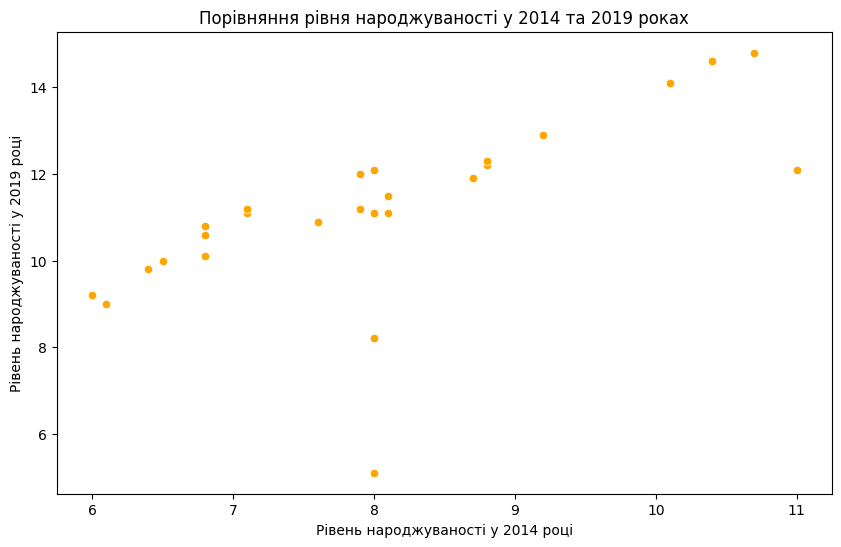

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='2014', y='2019', data=df, color='orange')
plt.xlabel('Рівень народжуваності у 2014 році')
plt.ylabel('Рівень народжуваності у 2019 році')
plt.title('Порівняння рівня народжуваності у 2014 та 2019 роках')
plt.show()

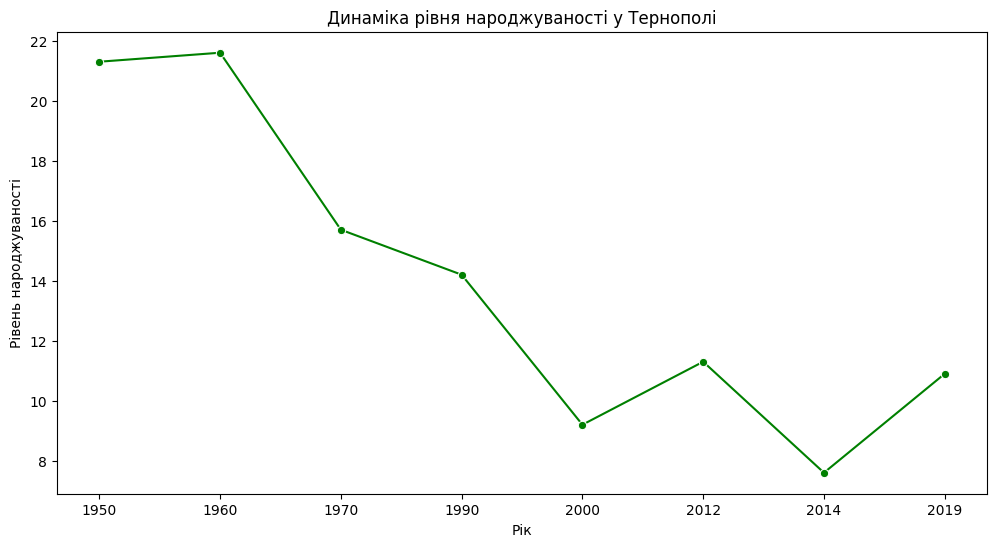

In [68]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.columns[1:], y=df.loc[18, df.columns[1:]], marker='o', color='green')
plt.xlabel('Рік')
plt.ylabel('Рівень народжуваності')
plt.title('Динаміка рівня народжуваності у Тернополі')
plt.show()

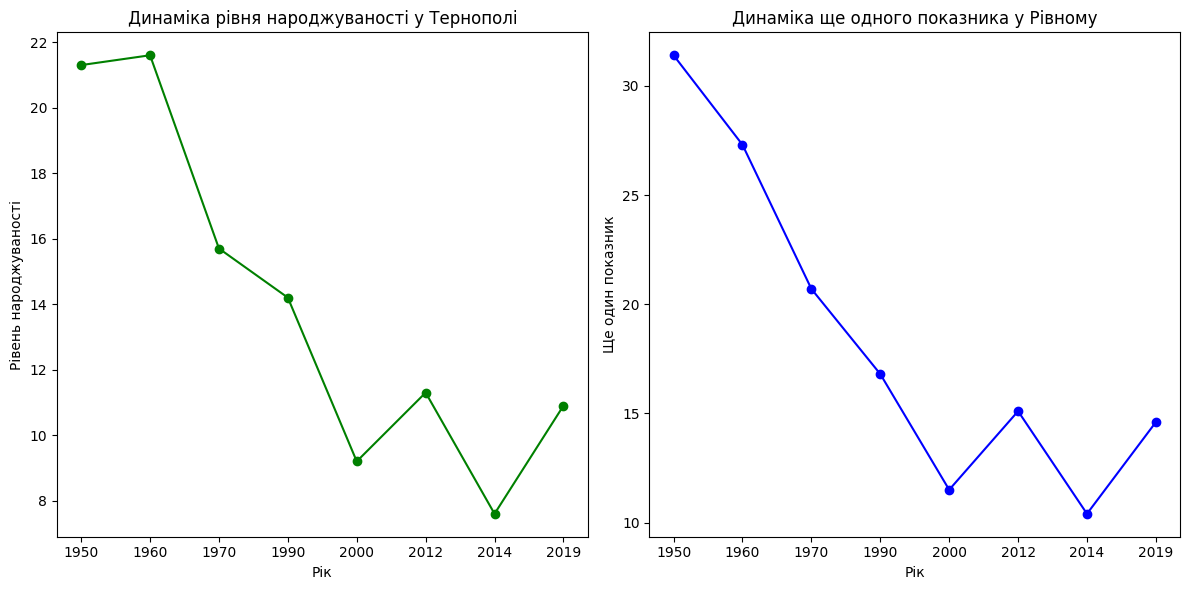

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(df.columns[1:], df.loc[18, df.columns[1:]], marker='o', color='green')
ax1.set_xlabel('Рік')
ax1.set_ylabel('Рівень народжуваності')
ax1.set_title('Динаміка рівня народжуваності у Тернополі')

ax2.plot(df.columns[1:], df.loc[6, df.columns[1:]], marker='o', color='blue')
ax2.set_xlabel('Рік')
ax2.set_ylabel('Ще один показник')
ax2.set_title('Динаміка ще одного показника у Рівному')

plt.tight_layout()

plt.show()
